In [496]:
import shap
import pydot
import random
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn import metrics
from sklearn.svm import SVC
from sklearn import datasets
from lime import lime_tabular
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import (
    DecisionTreeClassifier
)
from sklearn.metrics import (
    classification_report,
    confusion_matrix
)
from sklearn.metrics import (
    balanced_accuracy_score,
    precision_score,
    accuracy_score,
    roc_auc_score,
    recall_score,
    f1_score,
)

## Código:

### Data Understanding:

In [497]:
class DataUnderstanding():
    def verificando_as_dimensões_do_dataframe(self, dataframe):
        dataframe = dataframe.shape
        print(f'Linhas: {dataframe[0]} \nColunas: {dataframe[1]}')

    def descrição(self, dataframe):
        dataframe = dataframe.describe().round(decimals=2)
        display(dataframe)

    def verificando_tipos(self, dataframe):
        dataframe = (
            dataframe.dtypes
            .to_frame('Tipos')
        )
        display(dataframe)

    def verificando_valores_nulos(self, dataframe):
        valores_nulos = dataframe.isnull().sum()
        percent_missing = (valores_nulos / len(dataframe))
        dataframe = pd.DataFrame(
            {
            'Quantidade': valores_nulos,
            'Porcentagem': percent_missing
            }
        )
        dataframe = dataframe.style.format('{:.2%}', subset=['Porcentagem'])
        display(dataframe)
    
    def verificando_valores_duplicados(self, dataframe):
        valores_repetidos = dataframe.apply(lambda x: x.duplicated()).sum()
        percent_missing = (valores_repetidos / len(dataframe))
        dataframe = pd.DataFrame(
            {
                'Quantidade': valores_repetidos,
                'Porcentagem': percent_missing
            },
            index=dataframe.columns
        )

        dataframe = dataframe.style.format('{:.2%}', subset=['Porcentagem'])
        display(dataframe)

    def frequencia_da_repetição_dos_valores(self, dataframe, coluna):
        dataframe = dataframe[coluna].value_counts().reset_index()
        return dataframe

    def verificando_correlação(self, dataframe):
        dataframe = dataframe.corr()
        return dataframe

### Data Preparetion:

In [498]:
class DataPreparetion(DataUnderstanding):
    def removendo_nulos(self, dataframe):
        return dataframe.dropna()
    
    def removendo_colunas(self, dataframe, colunas=[]):
        return dataframe.drop(colunas, axis=1)

    def substituindo_valores(self, dataframe, colunas, valores):      
        return dataframe[colunas].replace(valores)
    
    def convertendo_para_inteiro(self, dataframe, colunas):
        return dataframe[colunas].astype(int)

    def dummy(self, dataframe, colunas=[]):
        dataframe = pd.get_dummies(dataframe[colunas])
        colunas = dataframe.columns
        return dataframe, colunas
    
    def label_endcode(self, dataframe):
        training = LabelEncoder().fit(dataframe)
        dataframe = training.transform(dataframe)
        return dataframe
    
    def normalizando_os_dados(self, dataframe):
        return scale(dataframe)

### Data Visualization:

In [499]:
class DataVisualization(DataPreparetion):
    def gráfico_de_barras(self, dataframe, x, y):
        sns.barplot(
            data=dataframe,
            x=x,
            y=y
        )
        plt.show()

    def gráfico_de_linha_desempenho_do_modelo(self, y_true, y_pred):
        index = [i for i in range(1, len(y_pred)+1, 1)]

        fig = plt.figure(figsize=(12, 8))
        plt.plot(index, y_true, color='blue')
        plt.plot(index, y_pred, color='red')
        plt.xlabel('index')
        plt.ylabel('valores')
        plt.show()

    def gráfico_de_regressão_lmplot(self, dataframe, x, y, titulo):
        sns.lmplot(
            data=dataframe, 
            x=x,
            y=y
        )
        ax = plt.gca()
        ax.set_title(titulo)
        plt.show()

    def gráfico_de_correlação_pairplot(self, dataframe):
        sns.pairplot(dataframe)
        plt.show()

    def gráfico_de_correlação_heatmap(self, dataframe):
        sns.set(style='white')
        corr = dataframe.corr()
        plt.figure(figsize=(16, 10))
        sns.heatmap(corr, annot=True, cmap='RdBu_r', fmt='.2f', annot_kws={'size': 12})
        plt.show()

    def gráfico_outliers_boxplot(self, dataframe, figsize):
        dataframe = dataframe.select_dtypes(include='number')
        dataframe = dataframe.apply(scale)
        fig = plt.figure(figsize=figsize)
        sns.boxplot(data=dataframe)
        plt.show()

    def gráfico_de_distribuição_histplot(self, dataframe, coluna):
        sns.histplot(data=dataframe[coluna])

        plt.show()

# Regressão Logística:

## Dataframe:

### Seaborn Iris:

In [500]:
df_iris = sns.load_dataset("iris")

In [501]:
display(df_iris.head())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Código:

In [502]:
class RegressãoLogística(DataVisualization):
    def training(self, dataframe, x=[], y=[]):
        x_train, x_test, y_train, y_test = train_test_split(
            dataframe[x], 
            dataframe[y], 
            test_size=0.2, 
            random_state=42
        )

        training = (
            LogisticRegression().fit(x_train, y_train)
        )

        y_pred = training.predict(x_test)

        return training, y_pred
    
    def predictions(self, training, input):
        return training.predict(input)
        

if __name__ == '__main__':
    regressão_logística = RegressãoLogística()

## Output:

### Data Understanding:

In [503]:
display(df_iris.head())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [504]:
df_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

### Modelo:

In [505]:
x = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
y = ['species']

In [506]:
training, y_pred = regressão_logística.training(
    dataframe=df_iris,
    x=x,
    y=y
)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [507]:
df_iris['predictions'] = regressão_logística.predictions(
    training=training,
    input=df_iris[x]
)

In [508]:
display(df_iris[df_iris['species'] != df_iris['predictions']])

,sepal_length,sepal_width,petal_length,petal_width,species,predictions
70,5.9,3.2,4.8,1.8,versicolor,virginica
77,6.7,3.0,5.0,1.7,versicolor,virginica
83,6.0,2.7,5.1,1.6,versicolor,virginica


## Exercise:

## Dataframe:

### Golf:

In [509]:
path = r'../../../../data/golf_df.xlsx'
df_golf = pd.read_excel(
    io=path
)

In [510]:
display(df_golf.head())

,clima,temp,umidade,vento,jogar
0,sunny,hot,high,no,no
1,sunny,hot,high,yes,no
2,overcast,hot,high,no,yes
3,rainy,mild,high,no,yes
4,rainy,cool,normal,no,yes


### Código:

In [511]:
class exercise(DataVisualization):
    def training(self, dataframe, x=[], y=[]):
        x_train, x_test, y_train, y_test = train_test_split(
            dataframe[x], 
            dataframe[y], 
            test_size=0.2, 
            random_state=42
        )

        training = (
            LogisticRegression().fit(x_train, y_train)
        )

        y_pred = training.predict(x_test)

        return training, y_pred
    
    def predictions(self, training, input):
        return training.predict(input)
        

if __name__ == '__main__':
    exercise = exercise()

### Output:

### Data Understanding:

In [512]:
display(df_golf.head())

,clima,temp,umidade,vento,jogar
0,sunny,hot,high,no,no
1,sunny,hot,high,yes,no
2,overcast,hot,high,no,yes
3,rainy,mild,high,no,yes
4,rainy,cool,normal,no,yes


In [513]:
df_golf.columns

Index(['clima', 'temp', 'umidade', 'vento', 'jogar'], dtype='object')

In [514]:
for coluna in df_golf.columns:
    print(f'{coluna}:')
    display(exercise.frequencia_da_repetição_dos_valores(
        dataframe=df_golf,
        coluna=coluna
    ))

clima:


,index,clima
0,sunny,5
1,rainy,5
2,overcast,4


temp:


,index,temp
0,mild,6
1,hot,4
2,cool,4


umidade:


,index,umidade
0,high,7
1,normal,7


vento:


,index,vento
0,no,8
1,yes,6


jogar:


,index,jogar
0,yes,9
1,no,5


### Data Preparetion:

In [515]:
colunas = ['clima', 'temp', 'umidade', 'vento']

In [516]:
for coluna in colunas:
    df_golf[coluna] = exercise.label_endcode(
        dataframe=df_golf[coluna],
    )

### Modelo:

In [517]:
df_golf.columns

Index(['clima', 'temp', 'umidade', 'vento', 'jogar'], dtype='object')

In [518]:
x = ['clima', 'temp', 'umidade', 'vento']
y = ['jogar']

In [519]:
training, y_pred = exercise.training(
    dataframe=df_golf,
    x=x,
    y=y
)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [520]:
df_golf['predictions'] = exercise.predictions(
    training=training,
    input=df_golf[x]
)

In [521]:
display(df_golf.head())

,clima,temp,umidade,vento,jogar,predictions
0,2,1,0,0,no,yes
1,2,1,0,1,no,no
2,0,1,0,0,yes,yes
3,1,2,0,0,yes,yes
4,1,0,1,0,yes,yes


In [522]:
display(df_golf[df_golf['jogar'] != df_golf['predictions']])

,clima,temp,umidade,vento,jogar,predictions
0,2,1,0,0,no,yes
5,1,0,1,1,no,yes
10,2,2,1,1,yes,no


# Árvore de Decisão:

## Dataframe:

### Vendas:

In [523]:
path = r'../../../../data/vendas.xlsx'
df_sales = pd.read_excel(
    io=path
)

In [524]:
display(df_sales.head())

,media_rating,media_pedidos,test,cliente_comprou
0,1.5,11,No,Yes
1,2.5,11,No,No
2,2.5,11,No,No
3,1.5,13,No,Yes
4,2.5,13,No,No


## Código:

In [525]:
class ÁrvoreDeDecisão(DataVisualization):
    def training(self, dataframe, x=[], y=[]):
        x_train, x_test, y_train, y_test = train_test_split(
            dataframe[x], 
            dataframe[y], 
            test_size=0.2, 
            random_state=42
        )

        training = (
            DecisionTreeClassifier().fit(x_train, y_train)
        )

        y_pred = training.predict(x_test)

        return training, y_pred
    
    def predictions(self, training, input):
        return training.predict(input)
    
    def gráfico_de_decisão(self, dataframe, treinamento):
        fig = plt.figure(figsize=(40,20))

        gráfico_de_árvore = tree.plot_tree(
            decision_tree=treinamento,
            feature_names=dataframe.columns,
            class_names=['Yes', "No"],
            filled=True
        )

        return gráfico_de_árvore


if __name__ == '__main__':
    árvore_de_decisão = ÁrvoreDeDecisão()

## Output:

### Data Understanding:

In [526]:
display(df_sales.head())

,media_rating,media_pedidos,test,cliente_comprou
0,1.5,11,No,Yes
1,2.5,11,No,No
2,2.5,11,No,No
3,1.5,13,No,Yes
4,2.5,13,No,No


In [527]:
x = ["media_rating", "media_pedidos", "test"]
y = ["cliente_comprou"]

### Data Preparetion:

In [528]:
df_sales_copy = df_sales.copy()

In [529]:
dataframe, colunas = árvore_de_decisão.dummy(
    dataframe=df_sales,
    colunas=x
)
df_sales[colunas] = dataframe[colunas]

In [530]:
df_sales = árvore_de_decisão.removendo_colunas(
    dataframe=df_sales,
    colunas=['test']
)

In [531]:
df_sales['cliente_comprou'] = exercise.label_endcode(
    dataframe=df_sales['cliente_comprou'],
)

In [532]:
display(df_sales.head())

,media_rating,media_pedidos,cliente_comprou,test_No,test_Yes
0,1.5,11,1,1,0
1,2.5,11,0,1,0
2,2.5,11,0,1,0
3,1.5,13,1,1,0
4,2.5,13,0,1,0


In [533]:
df_sales.columns

Index(['media_rating', 'media_pedidos', 'cliente_comprou', 'test_No',
       'test_Yes'],
      dtype='object')

### Modelo:

In [534]:
x = ['media_rating', 'media_pedidos', 'test_No', 'test_Yes']
y = ["cliente_comprou"]

In [535]:
training, y_pred = árvore_de_decisão.training(
    dataframe=df_sales,
    x=x,
    y=y
)

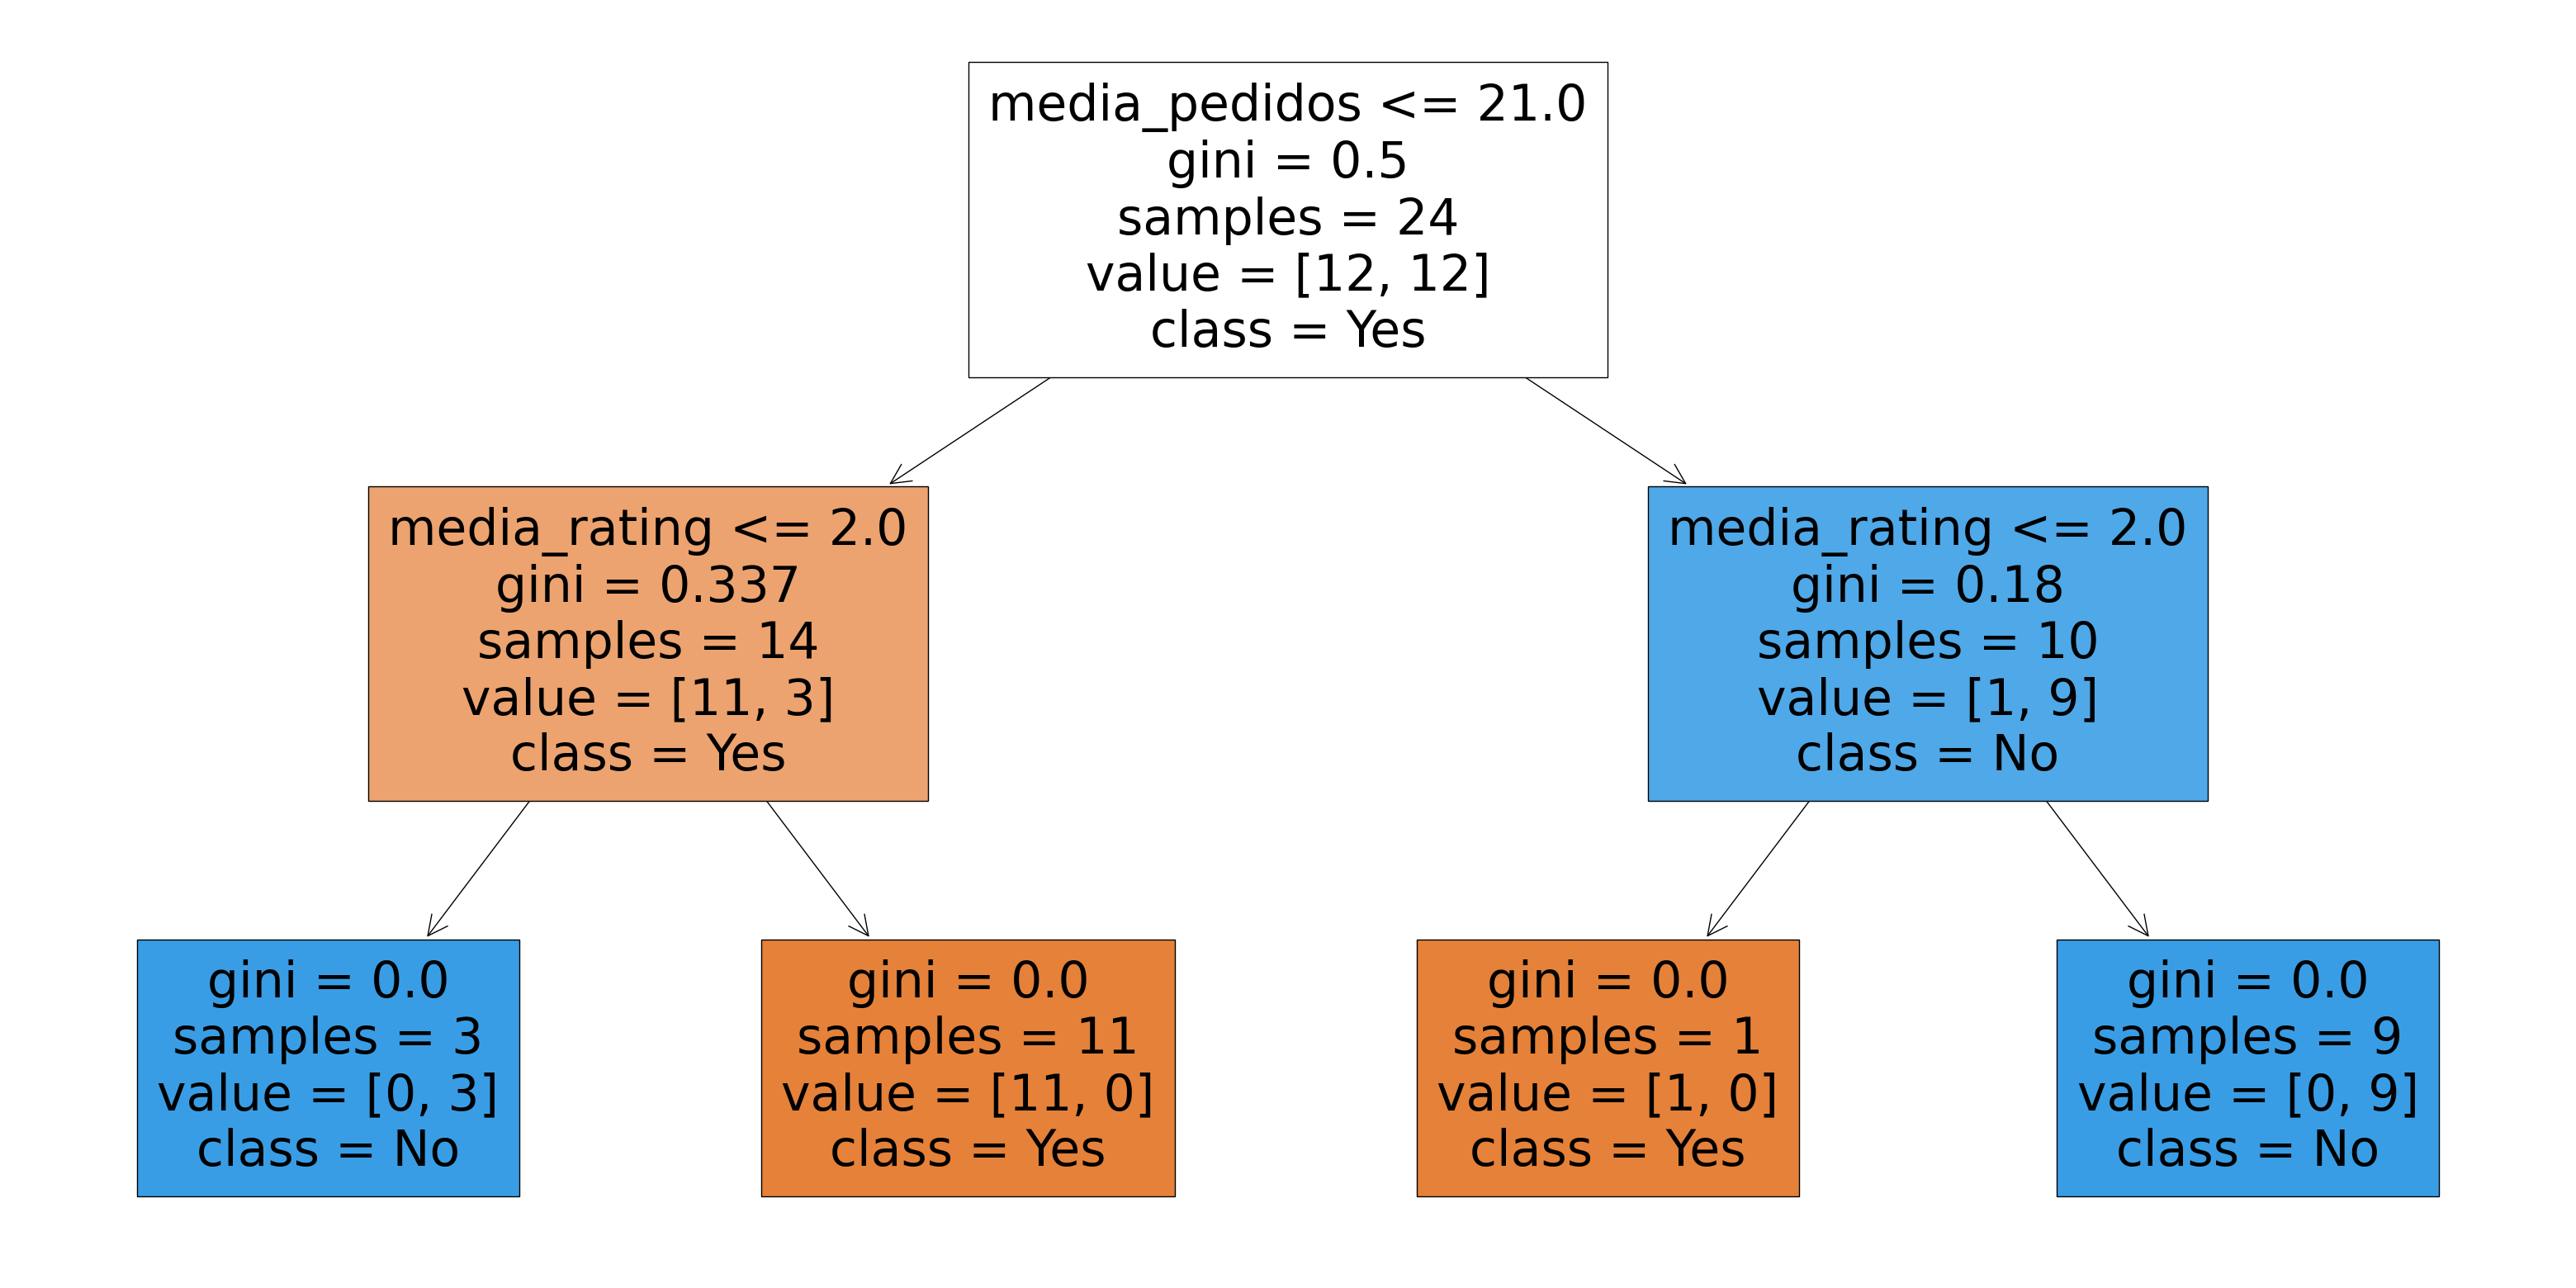

In [536]:
árvore_de_decisão.gráfico_de_decisão(
    dataframe=df_sales,
    treinamento=training
);

# KNN:

## Dataframe:

### Vinho:

In [537]:
df_wine = datasets.load_wine()

In [538]:
display(df_wine)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

## Código:

In [539]:
class KNN(DataVisualization):
    def training(self, x, y):
        x_train, x_test, y_train, y_test = train_test_split(
            x, 
            y, 
            test_size=0.2, 
            random_state=42
        )

        training = (
            KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train)
        )

        y_pred = training.predict(x_test)

        return training, y_pred, y_test
    
    def predictions(self, training, input):
        return training.predict(input)
    
    def gráfico_de_decisão(self, dataframe, treinamento):
        fig = plt.figure(figsize=(40,20))

        gráfico_de_árvore = tree.plot_tree(
            decision_tree=treinamento,
            feature_names=dataframe.columns,
            class_names=['Yes', "No"],
            filled=True
        )

        return gráfico_de_árvore
    
    def métrica(self, y_test, y_pred):
        '''Model Accuracy, how often is the classifier correct?'''
        print("Accuracy:",metrics.accuracy_score(y_test, y_pred))   


if __name__ == '__main__':
    knn = KNN()

# Output:

### Data Understanding:

In [540]:
display(df_wine.feature_names)

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

### Data Preparetion:

### Modelo:

In [541]:
training, y_pred, y_test = knn.training(
    x=df_wine.data,
    y=df_wine.target
);

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


In [542]:
knn.métrica(
    y_pred=y_pred,
    y_test=y_test
)

Accuracy: 0.7222222222222222


# SVM:

## Dataframe:

In [543]:
df_bc = datasets.load_breast_cancer()

In [544]:
display(df_bc)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

## Código:

In [545]:
class SVM(DataVisualization):
    def training(self, x, y):
        x_train, x_test, y_train, y_test = train_test_split(
            x, 
            y, 
            test_size=0.3, 
            random_state=1, 
            stratify=y
        )

        training_std = (
            StandardScaler().fit(x_train, y_train)
        )

        x_train_std = training_std.transform(x_train)
        x_test_std = training_std.transform(x_test)

        svc = (
            SVC(C=1.0, random_state=1, kernel='linear')
            .fit(x_train_std, y_train)
        )

        training = (
            svc.fit(x_train_std, y_train)
        )

        y_pred = svc.predict(x_test_std)

        return training, y_pred, y_test
    
    def predictions(self, training, input):
        return training.predict(input)
    
    def gráfico_de_decisão(self, dataframe, treinamento):
        fig = plt.figure(figsize=(40,20))

        gráfico_de_árvore = tree.plot_tree(
            decision_tree=treinamento,
            feature_names=dataframe.columns,
            class_names=['Yes', "No"],
            filled=True
        )

        return gráfico_de_árvore
    
    def métrica(self, y_test, y_pred):
        '''Model Accuracy, how often is the classifier correct?'''
        print("Accuracy score %.3f" %metrics.accuracy_score(y_test, y_pred))

    def gráfico_de_dispersão(self, x, y):
        gráfico = plt.scatter(x[:, 0], x[:, 1], c=y)
        return gráfico


if __name__ == '__main__':
    svm = SVM()

## Output:

### Data Understanding:

### Data Preparetion:

### Data Visualization:

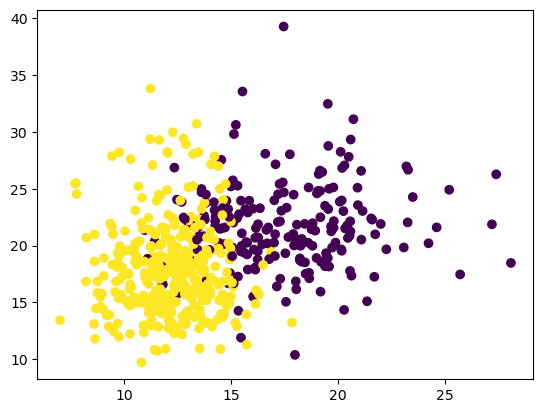

In [546]:
svm.gráfico_de_dispersão(
    x=df_bc.data,
    y=df_bc.target,
)

### Modelo:

In [547]:
training, y_pred, y_test = svm.training(
    x = df_bc.data,
    y = df_bc.target
)

In [548]:
svm.métrica(
    y_pred=y_pred, 
    y_test=y_test
)

Accuracy score 0.953


# Métricas:

## Dataframe:

### Bank:

In [549]:
path = r'../../../../data/Bank_Personal_Loan_Modelling.xlsx'
df_bank = pd.read_excel(
    io=path
)

In [550]:
display(df_bank.head())

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1


## Código:

In [551]:
class Metrics(DataVisualization):
    def training(self, x, y):
        x_train, x_test, y_train, y_test = train_test_split(
            x, 
            y, 
            test_size=0.2, 
            stratify=y
        )

        training = (
            LogisticRegression().fit(x_train, y_train)
        )

        y_pred = training.predict(x_train)
        x_test.assign(churn = y_test).assign(label = training.predict(x_test))

        return training, y_pred, x_train, x_test, y_train, y_test
    
    def predictions(self, training, input):
        return training.predict(input)
    
    def gráfico_de_métricas(self, training, x_test, y_test):
        fig = plt.figure(figsize=(40,20))

        gráfico_de_métricas = plot_confusion_matrix(training, x_test, y_test, values_format='d');

        return gráfico_de_métricas
    
    def métrica(self, training, x_train, x_test, y_train, y_test):
        print(f"Acurácia (Treino): {accuracy_score(y_train, training.predict(x_train))}")
        print(f"Acurácia (Teste): {accuracy_score(y_test, training.predict(x_test))}")
        print("====================================")
        print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, training.predict(x_train))}")
        print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, training.predict(x_test))}")
        print("====================================")
        print(f"Precision (Treino): {precision_score(y_train, training.predict(x_train))}")
        print(f"Precision (Teste): {precision_score(y_test, training.predict(x_test))}")
        print("====================================")
        print(f"Recall (Treino): {recall_score(y_train, training.predict(x_train))}")
        print(f"Recall (Teste): {recall_score(y_test, training.predict(x_test))}")
        print("====================================")
        print(f"F1-Score (Treino): {f1_score(y_train, training.predict(x_train))}")
        print(f"F1-Score (Teste): {f1_score(y_test, training.predict(x_test))}")
        print("====================================")
        print(f"ROCAUC (Treino): {roc_auc_score(y_train, training.predict_proba(x_train)[:,1])}")
        print(f"ROCAUC (Teste): {roc_auc_score(y_test, training.predict_proba(x_test)[:,1])}")
    
    def gráfico_de_roc_curve(self, training, x_test, y_test):
        fig = plt.figure(figsize=(40,20))

        gráfico_de_métricas = plot_roc_curve(training, x_test, y_test)

        return gráfico_de_métricas

    def avaliação_das_métricas(self, training, x_train, x_test, y_train, y_test):
        metricas = {
            'model': ['Logistic Regression', 'Logistic Regression'],
            'modo': ['treino', 'teste'],
            'accuracy': [accuracy_score(y_train, training.predict(x_train)), accuracy_score(y_test, training.predict(x_test))],
            'balanced_accuracy': [balanced_accuracy_score(y_train, training.predict(x_train)), balanced_accuracy_score(y_test, training.predict(x_test))],
            'precision': [precision_score(y_train, training.predict(x_train)), precision_score(y_test, training.predict(x_test))],
            'recall': [recall_score(y_train, training.predict(x_train)), recall_score(y_test, training.predict(x_test))],
            'f1_score': [f1_score(y_train, training.predict(x_train)), f1_score(y_test, training.predict(x_test))],
            'rocauc': [roc_auc_score(y_train, training.predict_proba(x_train)[:,1]), roc_auc_score(y_test, training.predict_proba(x_test)[:,1])]

        }

        return pd.DataFrame(metricas)


if __name__ == '__main__':
    metrics = Metrics()

## Output:

### Data Understanding:

In [552]:
display(df_bank.head())

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1


In [553]:
metrics.verificando_as_dimensões_do_dataframe(dataframe=df_bank)

Linhas: 5000 
Colunas: 13


In [554]:
df_bank.columns

Index(['ID', 'Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account',
       'Online', 'CreditCard'],
      dtype='object')

In [555]:
metrics.verificando_valores_nulos(dataframe=df_bank)

,Quantidade,Porcentagem
ID,0,0.00%
Age,0,0.00%
Experience,0,0.00%
Income,0,0.00%
Family,0,0.00%
CCAvg,0,0.00%
Education,0,0.00%
Mortgage,0,0.00%
Personal_Loan,0,0.00%
Securities_Account,0,0.00%


### Data Preparetion:

In [556]:
df_bank_cppy = df_bank.copy()

### Data Visualization:

### Modelo:

In [557]:
x = df_bank[["Age", "Experience", "Income", "Family", "CCAvg", "Education", "Mortgage", "CreditCard", "Securities_Account", "CD_Account", "Online"]]
y = df_bank[['Personal_Loan']]

In [558]:
training, y_pred, x_train, x_test, y_train, y_test = metrics.training(
    x=x,
    y=y
)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


<Figure size 4000x2000 with 0 Axes>

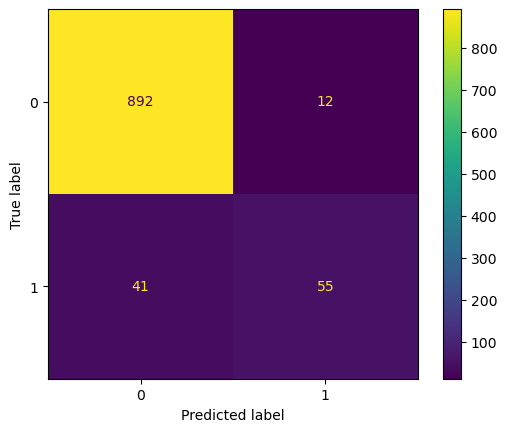

In [559]:
metrics.gráfico_de_métricas(
    training=training,
    y_test=y_test,
    x_test=x_test,
);

In [560]:
metrics.métrica(
    training=training,
    x_train=x_train, 
    x_test=x_test, 
    y_train=y_train, 
    y_test=y_test
)

Acurácia (Treino): 0.9495
Acurácia (Teste): 0.947
Acurácia Balanceada (Treino): 0.7998248525073747
Acurácia Balanceada (Teste): 0.7798211651917404
Precision (Treino): 0.8137931034482758
Precision (Teste): 0.8208955223880597
Recall (Treino): 0.6145833333333334
Recall (Teste): 0.5729166666666666
F1-Score (Treino): 0.7002967359050445
F1-Score (Teste): 0.6748466257668712
ROCAUC (Treino): 0.9548390256268436
ROCAUC (Teste): 0.9551415007374632


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


<Figure size 4000x2000 with 0 Axes>

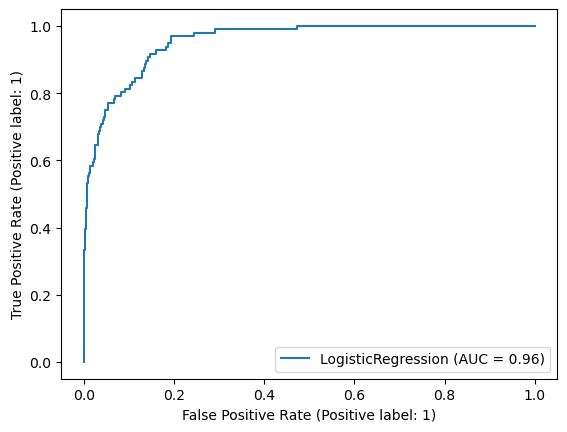

In [561]:
metrics.gráfico_de_roc_curve(
    training=training,
    y_test=y_test,
    x_test=x_test,
);

In [562]:
metrics.avaliação_das_métricas(
    training=training,
    x_train=x_train, 
    x_test=x_test, 
    y_train=y_train, 
    y_test=y_test
)

,model,modo,accuracy,balanced_accuracy,precision,recall,f1_score,rocauc
0,Logistic Regression,treino,0.9495,0.799825,0.813793,0.614583,0.700297,0.954839
1,Logistic Regression,teste,0.9470,0.779821,0.820896,0.572917,0.674847,0.955142


# Tunning de Hiperparâmetros:

## Dataframe:

#### Bnnk:

In [563]:
path = r'../../../../data/Bank_Personal_Loan_Modelling.xlsx'
df_bank = pd.read_excel(
    io=path
)

In [564]:
display(df_bank.head())

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1


## Código:

In [565]:
class HyperparameterTuning(DataVisualization):
    def training(self, x, y):
        x_train, x_test, y_train, y_test = train_test_split(
            x, 
            y, 
            test_size=0.2, 
            stratify=y
        )

        training = (
            DecisionTreeClassifier().fit(x_train, y_train)
        )

        y_pred = training.predict(x_train)
        x_test.assign(churn = y_test).assign(label = training.predict(x_test))

        return training, y_pred, x_train, x_test, y_train, y_test
    
    def predictions(self, training, input):
        return training.predict(input)
    
    def métrica(self, training, x_train, x_test, y_train, y_test):
        print(f"Acurácia (Treino): {accuracy_score(y_train, training.predict(x_train))}")
        print(f"Acurácia (Teste): {accuracy_score(y_test, training.predict(x_test))}")
        print("====================================")
        print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, training.predict(x_train))}")
        print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, training.predict(x_test))}")
        print("====================================")
        print(f"Precision (Treino): {precision_score(y_train, training.predict(x_train))}")
        print(f"Precision (Teste): {precision_score(y_test, training.predict(x_test))}")
        print("====================================")
        print(f"Recall (Treino): {recall_score(y_train, training.predict(x_train))}")
        print(f"Recall (Teste): {recall_score(y_test, training.predict(x_test))}")
        print("====================================")
        print(f"F1-Score (Treino): {f1_score(y_train, training.predict(x_train))}")
        print(f"F1-Score (Teste): {f1_score(y_test, training.predict(x_test))}")
        print("====================================")
        print(f"ROCAUC (Treino): {roc_auc_score(y_train, training.predict_proba(x_train)[:,1])}")
        print(f"ROCAUC (Teste): {roc_auc_score(y_test, training.predict_proba(x_test)[:,1])}")

    def optimize_parameters_grid_search(self, training):
        # Criamos um dicionário que os hiperparâmetros que queremos treinar o modelo
        parameters = {
        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
        }

        # Criamos um GridSearch passando o modelo, os parâmetros, a métrica que queremos otimizar. 
        grid_search = GridSearchCV(training, parameters, scoring='roc_auc', cv=5, n_jobs=-1)

        training = grid_search.fit(x_train, y_train)

        parameters = training.best_estimator_.get_params()

        return parameters, grid_search
    
    def optimize_parameters_randomized_search(self):
        # Criamos um dicionário que os hiperparâmetros que queremos treinar o modelo
        parameters = {
            'learning_rate': [0.001, 0.01], 
            'num_leaves': [2, 128],
            'min_child_samples': [1, 100],
            'subsample': [0.05, 1.0],
            'colsample_bytree': [0.1, 1.0]
        }

        # Criamos um GridSearch passando o modelo, os parâmetros, a métrica que queremos otimizar. 
        lgbm = LGBMClassifier(n_jobs=-1)
        random_search = RandomizedSearchCV(lgbm, parameters, scoring='roc_auc', cv=5, n_iter=5, n_jobs=-1)

        random_search = random_search.fit(x_train, y_train)

        return parameters, random_search
    
    def optimal_training(self, x, y):
        x_train, x_test, y_train, y_test = train_test_split(
            x, 
            y, 
            test_size=0.2, 
            stratify=y
        )

        training = (
            DecisionTreeClassifier(
                ccp_alpha = 0.0,
                class_weight= None,
                criterion = 'gini',
                max_depth = 3,
                max_features = None,
                max_leaf_nodes = None,
                min_impurity_decrease = 0.0,
                min_samples_leaf = 1,
                min_samples_split = 2,
                min_weight_fraction_leaf = 0.0,
                random_state = None,
                splitter = 'best'
            ).fit(x_train, y_train)
        )

        y_pred = training.predict(x_train)
        x_test.assign(churn = y_test).assign(label = training.predict(x_test))

        return training, y_pred, x_train, x_test, y_train, y_test
    
    def resultados_do_search(self, search):
        # criando uma tabela com os resultados do grid_search
        results = pd.DataFrame(search.cv_results_)

        # rankeando esses resultados
        return results.sort_values(by='rank_test_score')

    def avaliação_das_métricas(self, training, x_train, x_test, y_train, y_test):
        metricas = {
            'model': ['Logistic Regression', 'Logistic Regression'],
            'modo': ['treino', 'teste'],
            'accuracy': [accuracy_score(y_train, training.predict(x_train)), accuracy_score(y_test, training.predict(x_test))],
            'balanced_accuracy': [balanced_accuracy_score(y_train, training.predict(x_train)), balanced_accuracy_score(y_test, training.predict(x_test))],
            'precision': [precision_score(y_train, training.predict(x_train)), precision_score(y_test, training.predict(x_test))],
            'recall': [recall_score(y_train, training.predict(x_train)), recall_score(y_test, training.predict(x_test))],
            'f1_score': [f1_score(y_train, training.predict(x_train)), f1_score(y_test, training.predict(x_test))],
            'rocauc': [roc_auc_score(y_train, training.predict_proba(x_train)[:,1]), roc_auc_score(y_test, training.predict_proba(x_test)[:,1])]
        }

        return pd.DataFrame(metricas)


if __name__ == '__main__':
    hyperparameter_tuning = HyperparameterTuning()

## Output:

### Data Understanding:

In [566]:
display(df_bank.head())

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1


In [567]:
hyperparameter_tuning.verificando_valores_nulos(dataframe=df_bank)

,Quantidade,Porcentagem
ID,0,0.00%
Age,0,0.00%
Experience,0,0.00%
Income,0,0.00%
Family,0,0.00%
CCAvg,0,0.00%
Education,0,0.00%
Mortgage,0,0.00%
Personal_Loan,0,0.00%
Securities_Account,0,0.00%


### Data Preparetion:

### Data Visualization:

### Modelo:

In [568]:
x = df_bank[["Age", "Experience", "Income", "Family", "CCAvg", "Education", "Mortgage", "CreditCard", "Securities_Account", "CD_Account", "Online"]]
y = df_bank['Personal_Loan']

In [569]:
training, y_pred, x_train, x_test, y_train, y_test = hyperparameter_tuning.training(
    x=x,
    y=y
)

In [570]:
hyperparameter_tuning.métrica(
    training=training,
    x_train=x_train,
    x_test=x_test,
    y_train=y_train,
    y_test=y_test,
)

Acurácia (Treino): 1.0
Acurácia (Teste): 0.982
Acurácia Balanceada (Treino): 1.0
Acurácia Balanceada (Teste): 0.9481471238938053
Precision (Treino): 1.0
Precision (Teste): 0.90625
Recall (Treino): 1.0
Recall (Teste): 0.90625
F1-Score (Treino): 1.0
F1-Score (Teste): 0.90625
ROCAUC (Treino): 1.0
ROCAUC (Teste): 0.9481471238938053


In [571]:
parameters, grid_search = hyperparameter_tuning.optimize_parameters_grid_search(training=training)
print(parameters)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [572]:
training, y_pred, x_train, x_test, y_train, y_test = hyperparameter_tuning.optimal_training(
    x=x,
    y=y
)

In [573]:
hyperparameter_tuning.métrica(
    training=training,
    x_train=x_train,
    x_test=x_test,
    y_train=y_train,
    y_test=y_test,
)

Acurácia (Treino): 0.98275
Acurácia (Teste): 0.986
Acurácia Balanceada (Treino): 0.9159752949852508
Acurácia Balanceada (Teste): 0.9317385693215339
Precision (Treino): 0.9846153846153847
Precision (Teste): 0.9880952380952381
Recall (Treino): 0.8333333333333334
Recall (Teste): 0.8645833333333334
F1-Score (Treino): 0.9026798307475318
F1-Score (Teste): 0.9222222222222222
ROCAUC (Treino): 0.9951045843703908
ROCAUC (Teste): 0.9948377581120943


In [574]:
hyperparameter_tuning.resultados_do_search(
    search=grid_search
)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.006500,0.000790,0.003618,0.000437,3,{'max_depth': 3},0.991976,0.988270,0.994512,0.994081,0.998455,0.993459,0.003334,1
3,0.006592,0.000892,0.003947,0.000379,4,{'max_depth': 4},0.984398,0.982001,0.994503,0.994297,0.998527,0.990745,0.006388,2
4,0.006855,0.000729,0.004106,0.001078,5,{'max_depth': 5},0.987160,0.980933,0.993785,0.986250,0.985235,0.986672,0.004148,3
5,0.006824,0.000611,0.004382,0.000805,6,{'max_depth': 6},0.970576,0.981822,0.988495,0.985316,0.978768,0.980995,0.006150,4
1,0.005008,0.000470,0.003575,0.000513,2,{'max_depth': 2},0.951203,0.965108,0.980555,0.966733,0.969760,0.966672,0.009424,5
6,0.008078,0.001132,0.004071,0.000533,7,{'max_depth': 7},0.934247,0.978571,0.981822,0.947477,0.971664,0.962756,0.018650,6
7,0.008595,0.002592,0.005587,0.002911,8,{'max_depth': 8},0.923224,0.960967,0.969158,0.947702,0.972975,0.954805,0.018011,7
8,0.007286,0.000186,0.004271,0.000392,9,{'max_depth': 9},0.916745,0.942780,0.961937,0.940750,0.972427,0.946928,0.019193,8
9,0.007302,0.000739,0.003470,0.000774,10,{'max_depth': 10},0.889230,0.942924,0.962952,0.948250,0.964587,0.941588,0.027469,9
0,0.004934,0.000404,0.004381,0.000389,1,{'max_depth': 1},0.802123,0.833863,0.839665,0.851961,0.888578,0.843238,0.028010,10


# Randomized Search:

In [575]:
parameters, random_search = hyperparameter_tuning.optimize_parameters_randomized_search()

In [576]:
hyperparameter_tuning.resultados_do_search(
    search=random_search
)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_num_leaves,param_min_child_samples,param_learning_rate,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.074577,0.017399,0.005924,0.000738,0.05,128,100,0.01,1.0,"{'subsample': 0.05, 'num_leaves': 128, 'min_ch...",0.994393,0.995662,0.994108,0.998132,0.995815,0.995622,0.001424,1
2,0.038781,0.007225,0.008891,0.005370,1.0,2,100,0.01,0.1,"{'subsample': 1.0, 'num_leaves': 2, 'min_child...",0.941862,0.951106,0.936071,0.933493,0.964937,0.945494,0.011450,2
0,0.092751,0.019781,0.009500,0.006451,1.0,2,1,0.001,0.1,"{'subsample': 1.0, 'num_leaves': 2, 'min_child...",0.937918,0.947333,0.929461,0.927898,0.963976,0.941317,0.013280,3
4,0.045953,0.013838,0.005661,0.000712,1.0,128,100,0.001,0.1,"{'subsample': 1.0, 'num_leaves': 128, 'min_chi...",0.928286,0.937903,0.926137,0.916312,0.959404,0.933609,0.014610,4
1,0.130220,0.038223,0.008994,0.003026,1.0,128,1,0.01,0.1,"{'subsample': 1.0, 'num_leaves': 128, 'min_chi...",0.924524,0.917066,0.911426,0.889601,0.951680,0.918860,0.020119,5


# Interpretabilidade:

## Dataframe:

### Câncer de mam:

In [577]:
df_breast_cancer = load_breast_cancer()

In [578]:
display(df_breast_cancer)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

## Código:

In [579]:
class Interpretabilidade(DataVisualization):
    def training(self, x, y):
        x_train, x_test, y_train, y_test = train_test_split(
            x,
            y,
            train_size=0.90, 
            test_size=0.1, 
            stratify=y, 
            random_state=123
        )

        training = (
            LogisticRegression().fit(x_train, y_train)
        )

        y_pred = training.predict(x_train)

        return training, y_pred, x_train, x_test, y_train, y_test
    
    def predictions(self, training, input):
        return training.predict(input)
    
    def métrica(self, training, x_train, x_test, y_train, y_test):
        print("Test  Accuracy : %.2f"%training.score(x_test, y_test))
        print("Train Accuracy : %.2f"%training.score(x_train, y_train))
        print()
        print("Confusion Matrix : ")
        print(confusion_matrix(y_test, training.predict(x_test)))
        print()
        print("Classification Report")
        print(classification_report(y_test, training.predict(x_test)))

    def avaliação_das_métricas(self, training, x_train, x_test, y_train, y_test):
        metricas = {
            'model': ['Logistic Regression', 'Logistic Regression'],
            'modo': ['treino', 'teste'],
            'accuracy': [accuracy_score(y_train, training.predict(x_train)), accuracy_score(y_test, training.predict(x_test))],
            'balanced_accuracy': [balanced_accuracy_score(y_train, training.predict(x_train)), balanced_accuracy_score(y_test, training.predict(x_test))],
            'precision': [precision_score(y_train, training.predict(x_train)), precision_score(y_test, training.predict(x_test))],
            'recall': [recall_score(y_train, training.predict(x_train)), recall_score(y_test, training.predict(x_test))],
            'f1_score': [f1_score(y_train, training.predict(x_train)), f1_score(y_test, training.predict(x_test))],
            'rocauc': [roc_auc_score(y_train, training.predict_proba(x_train)[:,1]), roc_auc_score(y_test, training.predict_proba(x_test)[:,1])]
        }

        return pd.DataFrame(metricas)
    
    def gráfico_lime_x(self, dataframe, training, x_train, x_test, y_test):
        explainer = lime_tabular.LimeTabularExplainer(
            x_train, 
            mode="classification",
            class_names=dataframe.target_names,
            feature_names=dataframe.feature_names,
        )
        idx = random.randint(1, len(x_test))

        explanation = explainer.explain_instance(
            x_test[idx], 
            training.predict_proba,
            num_features=len(dataframe.feature_names)
        )

        print("Prediction : ", dataframe.target_names[training.predict(x_test[idx].reshape(1,-1))[0]])
        print("Actual :     ", dataframe.target_names[y_test[idx]])

        explanation.show_in_notebook()

    def gráfico_lime_y(self, dataframe, training, x_train, x_test, y_test):
        explainer = lime_tabular.LimeTabularExplainer(
            x_train, 
            mode="classification",
            class_names=dataframe.target_names,
            feature_names=dataframe.feature_names,
        )
        
        preds = training.predict(x_test)

        false_preds = np.argwhere((preds != y_test)).flatten()

        idx  = random.choice(false_preds)

        explanation = explainer.explain_instance(x_test[idx], training.predict_proba)

        print("Prediction : ", dataframe.target_names[training.predict(x_test[idx].reshape(1,-1))[0]])
        print("Actual :     ", dataframe.target_names[y_test[idx]])

        explanation.show_in_notebook()

    def gráfico_de_ggplot(self, dataframe, training):
        with plt.style.context("ggplot"):
            fig = plt.figure(figsize=(8,6))
            plt.barh(
                range(len(training.coef_[0])), 
                training.coef_[0], color=["red" if coef<0 else "green" for coef in training.coef_[0]]
            )
            plt.yticks(
                range(len(training.coef_[0])), 
                dataframe.feature_names
            );
            plt.title("Weights")
    

if __name__ == '__main__':
    interpretabilidade = Interpretabilidade()

## Output:

### Data Understanding:

In [580]:
for line in df_breast_cancer.DESCR.split("\n")[5:32]:
    print(line)

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radius, field
        10 is Radius SE, field 20 is Worst Radius.

        - class:
                - WDBC-Malignant
       

### Data Preparetion:

### DataVisualization:

### Modelo:

In [581]:
x = df_breast_cancer.data
y = df_breast_cancer.target

In [582]:
training, y_pred, x_train, x_test, y_train, y_test = interpretabilidade.training(
    x=x,
    y=y
)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [583]:
interpretabilidade.métrica(
    training=training, 
    x_train=x_train, 
    x_test=x_test, 
    y_train=y_train, 
    y_test=y_test
)

Test  Accuracy : 0.95
Train Accuracy : 0.95

Confusion Matrix : 
[[20  1]
 [ 2 34]]

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.97      0.94      0.96        36

    accuracy                           0.95        57
   macro avg       0.94      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57



In [584]:
interpretabilidade.gráfico_lime_x(
    dataframe=df_breast_cancer,
    training=training, 
    x_train=x_train, 
    x_test=x_test, 
    y_test=y_test
)

Prediction :  malignant
Actual :      malignant


In [585]:
interpretabilidade.gráfico_lime_y(
    dataframe=df_breast_cancer,
    training=training, 
    x_train=x_train, 
    x_test=x_test, 
    y_test=y_test
)

Prediction :  malignant
Actual :      benign


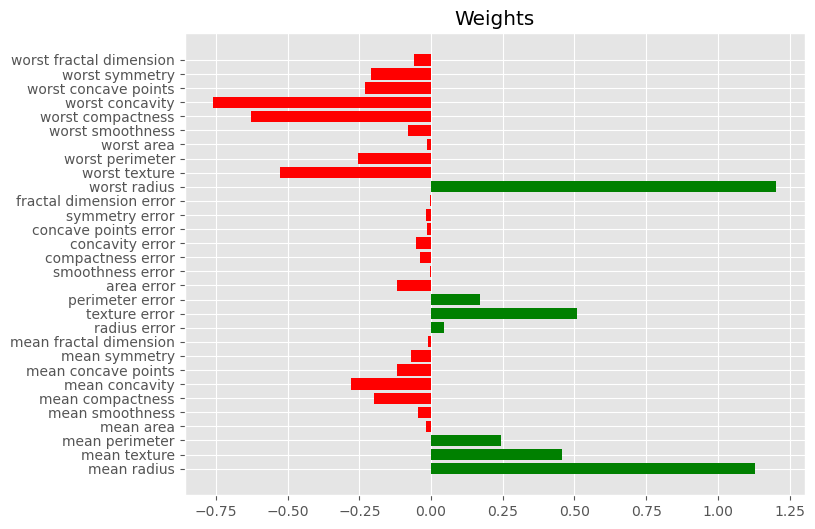

In [586]:
interpretabilidade.gráfico_de_ggplot(
    dataframe=df_breast_cancer,
    training=training, 
)

In [587]:
# shap.initjs()
# shap.initjs()
# corpus,y = shap.datasets.imdb()
# corpus_train, corpus_test, y_train, y_test = train_test_split(corpus, y, test_size=0.2, random_state=7)

# vectorizer = TfidfVectorizer(min_df=10)
# X_train = vectorizer.fit_transform(corpus_train).toarray() # sparse also works but Explanation slicing is not yet supported
# X_test = vectorizer.transform(corpus_test).toarray()
# model = sklearn.linear_model.LogisticRegression()
# model.fit(X_train, y_train)
# explainer = shap.Explainer(model, X_train, feature_names=vectorizer.get_feature_names())
# shap_values = explainer(X_test)
# shap.plots.beeswarm(shap_values)
